# **Tendências Musicais: Análise do Top 200 do Spotify**

<div align="right">

##### LinkedIn: [Eandro Cleiton](https://www.linkedin.com/in/eandro-cleiton/)  
##### GitHub: [EandroC](https://github.com/EandroC)

</div>

## **1\. Introdução**

### **1\.1\. Contexto**

Este notebook de análise exploratória de dados examina um conjunto de dados que reúne informações sobre as músicas que alcançaram o top 200 do Spotify a partir de 2016. Incluindo dados como o número de streams e semanas nas paradas, além de características de áudio como ritmo, tom e dançabilidade. Essas informações foram coletadas usando a API web do Spotify.

### **1\.2\. Objetivo**

Investigar os dados das músicas presente no conjunto de dados "spotify_top_songs_audio_features.csv", visando compreender os padrões de popularidade e as tendências musicais com base em suas características de áudio e atributos musicais. O objetivo é fornecer insights sobre as preferências do público e os elementos que influenciam na entradas dessas faixas nessa lista de mais reproduzidas.

### **1\.3\. Ferramentas Utilizadas**

Durante esse storytelling, foram empregadas as seguintes ferramentas:
- **Python:** Linguagem principal para manipulação, análise e visualização de dados. E suas bibliotecas:
    - **Pandas:** Manipulação de dados tabulares.
    - **Numpy:** Operações numéricas.
    - **Matplotlib.pyplot:** Visualização de dados.
    - **Matplotlib.patches import Patch:** Manipulação de elementos gráficos.
    - **Seaborn:** Edições nos gráficos
    - **re:** Manipulação de expressões regulares.
- **Kaggle:** é uma plataforma online que oferece conjuntos de dados, competições de ciência de dados, cursos e ambientes de computação em nuvem. Foi utilizado para acessar os dados.

#### **1\.3\.1\. Importação das bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import re

## **2\. Exploração dos dados**

Serão exploradas as colunas para identificar padrões e distribuições de dados em larga escala, proporcionando uma compreensão mais profunda e abrangente das informações presentes no conjunto de dados. Essa análise permitirá entender a natureza dos dados.

### **2\.1\. Guia sobre as colunas do CSV**

oferece informações sobre cada coluna do arquivo CSV, nome e descrição de cada uma das colunas.

- **id:** É um identificador único para a faixa, usado dentro da plataforma do Spotify para referência e recuperação fácil da música.

- **artist_names:** Esta coluna contém o nome ou nomes do artista ou artistas que criaram a faixa. Ajuda a identificar os criadores da música.

- **track_name:** O nome da faixa, que serve como seu título. É como a faixa é comumente referida e reconhecida.

- **source:** A fonte refere-se ao nome da gravadora que lançou a faixa. Ajuda a identificar a entidade responsável pela distribuição da música.

- **key:** Refere-se à tonalidade musical na qual a música é composta. Indica o centro tonal ou altura em torno do qual a melodia e a harmonia giram.

- **mode:** Indica se a faixa está em uma tonalidade maior ou menor, fornecendo insights sobre o humor geral ou a qualidade emocional da música.

- **time_signature:** Convenção notacional usada em partituras para indicar o número de batidas em cada compasso e o tipo de nota que recebe uma batida. Ajuda os músicos a interpretar o ritmo da faixa.

- **danceability:** Descreve o quão adequada uma faixa é para dançar com base em vários elementos musicais, como tempo, estabilidade rítmica, força do ritmo e regularidade geral. Varia de 0.0 (menos dançável) a 1.0 (mais dançável).

- **energy:** É uma medida perceptual de intensidade e atividade dentro de uma faixa, variando de 0.0 a 1.0. Reflete qualidades como tempo, volume e instrumentação que contribuem para a excitação ou vigor geral da música.

- **speechiness:** Detecta a presença de palavras faladas em uma faixa, distinguindo entre música puramente instrumental e faixas contendo elementos vocais, como canto ou fala. Varia de 0.0 (música) a 1.0 (apenas palavras faladas).

- **acousticness:** Medida que varia de 0.0 a 1.0 e indica a probabilidade de uma faixa ser acústica, com valores mais altos sugerindo uma proporção maior de instrumentação acústica.

- **instrumentalness:** Prevê se uma faixa contém vocais ou é puramente instrumental. Varia de 0.0 (vocais presentes) a 1.0 (sem vocais), com valores mais altos indicando uma maior probabilidade de música instrumental.

- **liveness:** Detecta a presença de uma plateia em uma gravação, com valores mais altos indicando uma maior probabilidade de a faixa ter sido executada ao vivo em vez de em um estúdio.

- **valence:** É medida a positividade musical transmitida por uma faixa, variando de 0.0 (negativa) a 1.0 (positiva). Reflete o conteúdo emocional da música, com valores mais altos indicando um humor mais positivo.

- **loudness:** Mede o volume geral de uma faixa em decibéis (dB), fornecendo informações sobre sua intensidade ou amplitude percebida. Influencia a percepção de "volume" ou "suavidade" da música.

- **tempo:** Refere-se à velocidade geral ou ao ritmo de uma faixa, medido em batidas por minuto (BPM). Indica o quão rápido ou lento a música soa e influencia seu caráter rítmico.

- **duration_ms:** A duração da faixa em milissegundos (ms), representando o tempo total desde o início até o fim da música.

- **weeks_on_chart:** O número de semanas que a faixa passou nas paradas das 200 melhores, indicando sua popularidade e longevidade em termos de desempenho nas paradas.

- **streams:** O número de vezes que a faixa foi reproduzida durante seu período nas paradas, fornecendo insights sobre sua popularidade e engajamento dos ouvintes.


### 2\.2\. Armazendo Dados do CSV em DataFrame

In [2]:
dados = pd.read_csv('spotify_top_songs_audio_features.csv', sep=',')

### 2\.3\. Tipos das Colunas

In [3]:
dados.dtypes

id                   object
artist_names         object
track_name           object
source               object
key                  object
mode                 object
time_signature       object
danceability        float64
energy              float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
loudness            float64
tempo               float64
duration_ms           int64
weeks_on_chart        int64
streams               int64
dtype: object

### 2\.4\. Dimensões do DataFrame

In [4]:
dados.shape

(6513, 19)

### 2\.5\. Visualizando do DataFrame

In [5]:
dados.head()

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.0,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.0,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.0,0.0995,0.236,-5.230,148.033,222973,125,512388123
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.0,0.3140,0.665,-7.438,167.911,284856,2,11985346
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.0,0.0755,0.688,-4.806,97.014,193507,30,301860377


### 2\.6\. Removendo Coluna

Removendo coluna 'id',  pois não achei utilidade para ela.

In [6]:
dados = dados.drop('id', axis=1)

### 2\.7\. Divisão proposta

A divisão proposta em três categorias — Artistas, Faixas e Descrições; Atributos Musicais; e Popularidade e Desempenho — busca organizar de forma lógica e intuitiva as colunas do conjunto de dados sobre faixas musicais, facilitando a compreensão e análise dos diferentes aspectos das músicas representadas.
#### Artistas, Faixas e Descrições:
Este conjunto de colunas contém informações sobre os artistas, as faixas e seus detalhes. Inclui o nome do(s) artista(s), o título da faixa, a gravadora responsável pelo lançamento, a tonalidade e o modo da música, além da estrutura rítmica.
- artist_names
- track_name
- source
- key
- mode
- time_signature

#### Atributos Musicais:
Essas colunas representam os atributos musicais da faixa, como sua capacidade de dança, energia, presença vocal, acústica, vivacidade, entre outros, que caracterizam seu estilo e composição.
- danceability
- energy
- speechiness
- acousticness
- instrumentalness
- liveness
- valence
- loudness
- tempo
- duration_ms

#### Popularidade e Desempenho:
Neste conjunto de colunas, são apresentadas métricas relacionadas à popularidade e desempenho da faixa, incluindo o número de semanas que ela ficou nas paradas e o total de reproduções durante esse período. Essas métricas ajudam a avaliar o sucesso e o alcance da música.
- weeks_on_chart
- streams

## 3\. Artistas, Faixas e Descrições

Nesta seção, você encontrará informações sobre a frequência de artistas, músicas e gravadoras que entraram nesse ranking. Também frequências sobre a tonalidade, modo e natida musical, esta seção oferece uma visão abrangente das diversas facetas que compõem cada faixa musical.

### 3\.1\. Contagem de Aparições de um Artista

Nesta análise das aparições de artistas no Top 200 do Spotify, são consideradas todas as faixas em que o artista está presente, incluindo suas participações e colaborações, desde que seu nome esteja listado na coluna "artist_names".

In [7]:
# Divide as strings da coluna 'artist_names' em artistas individuais e conta as ocorrências
artistas = dados['artist_names'].str.split(', ').explode().value_counts().reset_index()

# Renomeia as colunas
artistas.columns = ['Artista', 'QtdAparicoes']

artistas.head(10)

,Artista,QtdAparicoes
0,Drake,229
1,Taylor Swift,203
2,Bad Bunny,159
3,Travis Scott,127
4,Post Malone,111
5,Juice WRLD,110
6,The Weeknd,104
7,Ariana Grande,101
8,21 Savage,97
9,BTS,95


#### 3\.1\.1\. Gráfico - Top 10: Artistas por Quantidade de Aparições

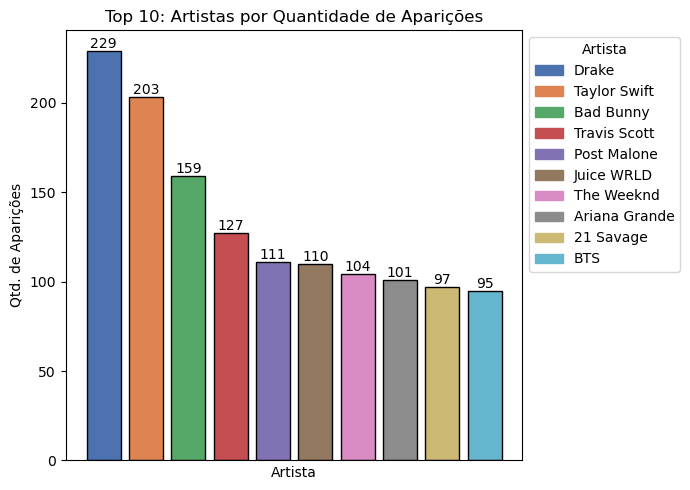

In [8]:
# Ordena artistas por número de aparições e seleciona os top 10.
artistas = artistas.sort_values(by='QtdAparicoes', ascending=False)
top_10 = artistas.head(10)

# Ordena artistas por número de aparições e seleciona os top 10.
cores = sns.color_palette("deep", len(top_10))
plt.figure(figsize=(7, 5))
bars = plt.bar(range(10), top_10['QtdAparicoes'], color=cores, edgecolor='black')

plt.ylabel('Qtd. de Aparições')
plt.xlabel('Artista')
plt.title('Top 10: Artistas por Quantidade de Aparições')

# Ordena artistas por número de aparições e seleciona os top 10.
for bar, label in zip(bars, top_10['QtdAparicoes']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{label}', 
             ha='center', va='bottom', fontsize=10, color='black')

plt.xticks([]) # Remove os rótulos do eixo x

#Adiciona uma legenda
legend_labels = top_10['Artista']
legend_handles = [Patch(color=cores[i], label=label) for i, label in enumerate(legend_labels)]
legend = plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))
legend.set_title('Artista')

plt.tight_layout()

plt.show()

### 3\.2\. Contagem de Aparições de uma Música

Aqui serão destacadas as músicas que mais frequentemente entraram no Top 200 do Spotify. É importante observar que novas versões da mesma música serão consideradas apenas se os mesmos artistas estiverem listados. Isso não implica necessariamente que foram as que permaneceram mais semanas no Top 200 ou são as mais reproduzidas, apenas indica que conseguiram entrar com maior frequência.

In [9]:
musicas = dados[['track_name', 'artist_names']].explode('artist_names').groupby(['track_name', 'artist_names']).size().reset_index(name='Quantidade')

musicas.columns = ['Musica', 'Artista', 'QtdAparicoes']
musicas = musicas.sort_values(by='QtdAparicoes', ascending=False)

musicas.head(10)

,Musica,Artista,QtdAparicoes
2324,Jingle Bell Rock,Bobby Helms,6
4155,Sleigh Ride,The Ronettes,6
3052,My Only Wish (This Year),Britney Spears,5
557,Believer,Imagine Dragons,5
4663,Thunder,Imagine Dragons,5
4370,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",5
5035,Whatever It Takes,Imagine Dragons,5
5438,rockstar (feat. 21 Savage),"Post Malone, 21 Savage",4
251,All The Stars (with SZA),"Kendrick Lamar, SZA",4
2893,Mean It,"Lauv, LANY",4


#### 3\.2\.1\. Gráfico - Top 10: Músicas por Quantidade de Aparições

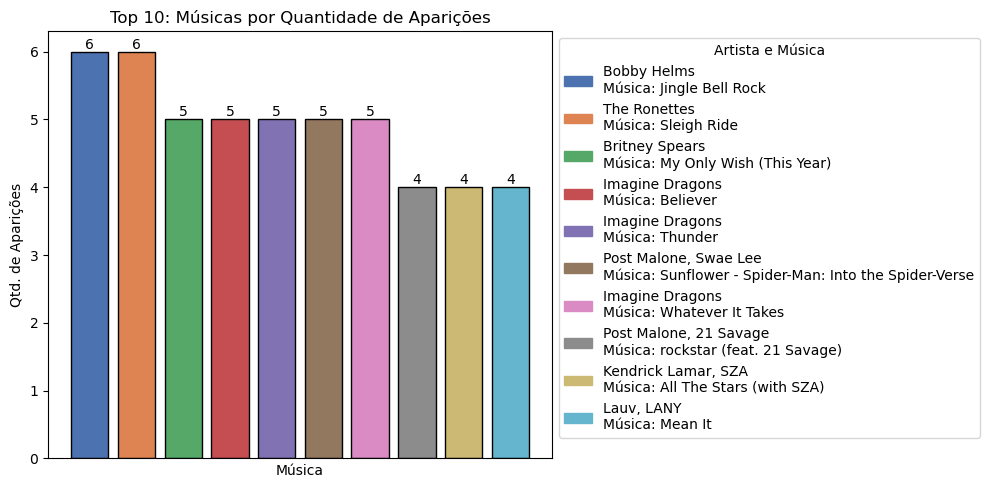

In [10]:
top_10 = musicas.head(10)
paleta_cores = plt.get_cmap('tab10')

cores = sns.color_palette("deep", len(top_10))
plt.figure(figsize=(10, 5))
bars = plt.bar(top_10['Musica'], top_10['QtdAparicoes'], color=cores, edgecolor='black')

plt.xlabel('Música')
plt.ylabel('Qtd. de Aparições')
plt.title('Top 10: Músicas por Quantidade de Aparições')

for bar, label in zip(bars, top_10['QtdAparicoes']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{label}', 
             va='bottom', ha='center', fontsize=10, color='black')

plt.xticks([])

legend_labels = [f"{artista} \nMúsica: {musica}" for artista, musica in zip(top_10['Artista'], top_10['Musica'])]
legend_handles = [Patch(color=cores[i], label=label) for i, label in enumerate(legend_labels)]
legend = plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))
legend.set_title('Artista e Música')

plt.tight_layout()
plt.show()

###  3\.3\. Contagem de Aparições de uma Gravadora

Aqui serão listadas a quantidade de vezes que uma gravadora apareceu no top 200 do Spotify.

In [11]:
sources = dados['source'].str.split(', ').explode().value_counts().reset_index()
sources.columns = ['source', 'QtdAparicoes']

sources.head(10)

,source,QtdAparicoes
0,Columbia,317
1,Republic Records,271
2,Taylor Swift,178
3,LLC,150
4,Warner Records,140
5,Rimas Entertainment LLC,125
6,Sony Music Latin,124
7,BIGHIT MUSIC,119
8,Atlantic Records,110
9,Atlantic Records UK,106


#### 3\.3\.1\. Gráfico - Top 10: Gravadoras por Quantidade de Aparições

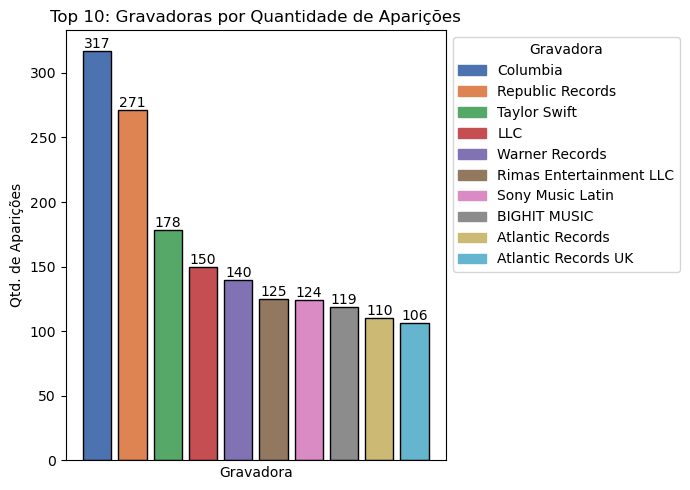

In [12]:
top_10 = sources.head(10)

cores = sns.color_palette("deep", len(top_10))
plt.figure(figsize=(7, 5))
bars = plt.bar(range(10), top_10['QtdAparicoes'], color=cores, edgecolor='black')
plt.xticks(range(10), top_10['source'], rotation=90)

plt.ylabel('Qtd. de Aparições')
plt.xlabel('Gravadora')
plt.title('Top 10: Gravadoras por Quantidade de Aparições')

for bar, label in zip(bars, top_10['QtdAparicoes']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{label}', 
             ha='center', va='bottom', fontsize=10, color='black')
    
plt.xticks([]) 

legend_labels = top_10['source'] 
legend_handles = [Patch(color=cores[i], label=label) for i, label in enumerate(legend_labels)]
legend = plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))
legend.set_title('Gravadora')

plt.tight_layout()
plt.show()


###  3\.4\. Aparições de uma Tonalidade Musicais

Aqui serão mostradas as frequências com que uma tonalidade musical, que indica o centro tonal ao redor do qual a melodia e a harmonia giram,, apareceu neste ranking do Spotify.

In [13]:
# Agrupa e conta ocorrências por chave
key = dados.groupby(['key']).size()
key

key
A        524
A#/Bb    465
B        567
C        705
C#/Db    942
D        524
D#/Eb    182
E        424
F        531
F#/Gb    501
G        595
G#/Ab    553
dtype: int64

#### 3\.4\.1\. Gráfico - Tonalidade Musical por Quantidade de Aparições

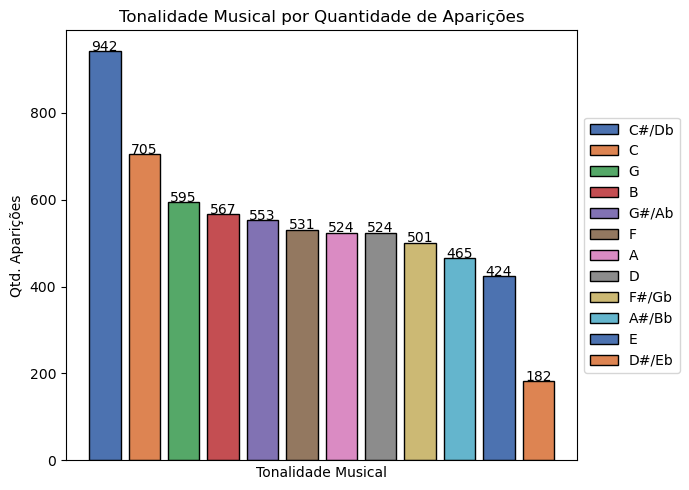

In [14]:
plt.figure(figsize=(7, 5))

key_counts = dados['key'].value_counts()
keys = key_counts.index

quantidades = key_counts.values

cores = sns.color_palette("deep", len(keys))
bars = plt.bar(keys, quantidades, color=cores, edgecolor='black')

plt.xlabel('Tonalidade Musical')
plt.ylabel('Qtd. Aparições')
plt.title('Tonalidade Musical por Quantidade de Aparições')

for i in range(len(keys)):
    plt.text(keys[i], quantidades[i] + 0.3, str(quantidades[i]), ha='center')

plt.xticks([]) 

plt.legend(bars, keys, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout() 
plt.show()

###  3\.5\. Aparições de um Modo Musical

Aqui serão exibidos o número de aparições no top 200 dos modos (mode), os quais indicam se a faixa está em uma tonalidade maior ou menor.

In [15]:
mode = dados.groupby(['mode']).size()
mode

mode
Major    3747
Minor    2766
dtype: int64

####  3\.5\.1\. Gráfico - Modo Musical por Quantidade de Aparições

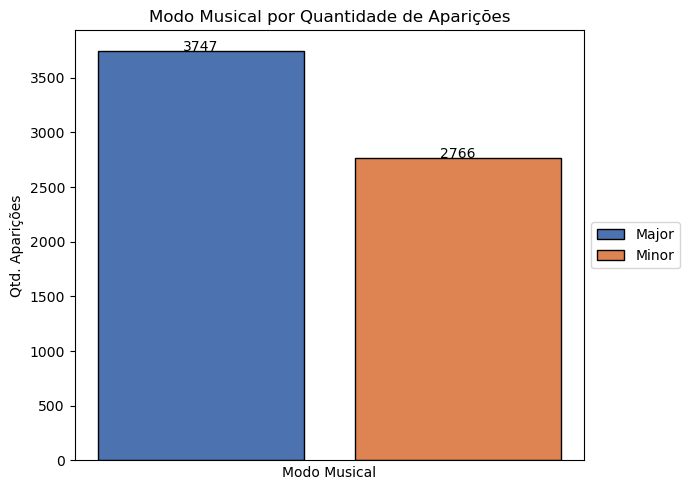

In [16]:
plt.figure(figsize=(7, 5))

mode_counts = dados['mode'].value_counts()
modes = mode_counts.index

quantidades = mode_counts.values

cores = sns.color_palette("deep", len(modes))

bars = plt.bar(modes, quantidades, color=cores, edgecolor='black')

plt.xlabel('Modo Musical')
plt.ylabel('Qtd. Aparições')
plt.title('Modo Musical por Quantidade de Aparições')

for i in range(len(modes)):
    plt.text(modes[i], quantidades[i] + 0.3, str(quantidades[i]), ha='center')

plt.xticks([]) 

plt.legend(bars, modes, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout() 

plt.show()

###  3\.6\. Aparições de uma Batida Musicail

Aqui serão exibidas a frequência do número de batidas em musicais.

###  3\.6\.1\. Ajustando o nome das categorias 

In [17]:
time_signature = dados.groupby(['time_signature']).size()
time_signature

time_signature
1            25
3 beats     324
4 beats    6057
5 beats     107
dtype: int64

In [18]:
dados.loc[dados['time_signature'] ==  '1', 
          'time_signature'] = "1 beat"

In [19]:
time_signature = dados.groupby(['time_signature']).size()
time_signature

time_signature
1 beat       25
3 beats     324
4 beats    6057
5 beats     107
dtype: int64

####  3\.6\.2\. Gráfico - Batida Musical por Quantidade de Aparições

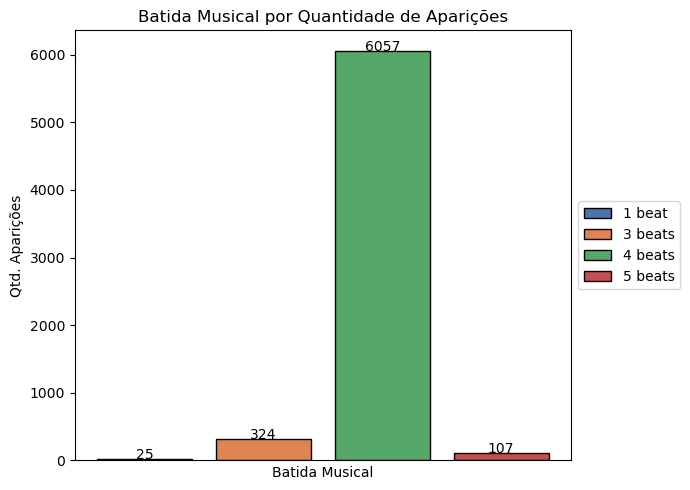

In [20]:
plt.figure(figsize=(7, 5))

time_counts = dados['time_signature'].value_counts()
times = time_counts.index.sort_values()  # Ordena os índices em ordem alfabética

quantidades = time_counts[times].values  # Reordena as quantidades de acordo com os índices ordenados

cores = sns.color_palette("deep", len(times))

bars = plt.bar(times, quantidades, color=cores, edgecolor='black')

plt.xlabel('Batida Musical')
plt.ylabel('Qtd. Aparições')
plt.title('Batida Musical por Quantidade de Aparições')

for i in range(len(times)):
    plt.text(times[i], quantidades[i] + 0.3, str(quantidades[i]), ha='center')

plt.xticks([])

plt.legend(bars, times, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

plt.show()

## 4\. Atributos Musicais

### 4\.1\. Removendo duplicatas

Acredito que a existência de duplicatas pode influenciar os resultados desse tópico. Além disso, não inclui as colunas referentes às semanas no gráfico e à quantidade de streams, uma vez que não são pertinentes para determinar a singularidade de uma música.

In [21]:
dados_sem_duplicatas = dados.drop(['weeks_on_chart', 'streams'], axis=1)

duplicatas = dados_sem_duplicatas.duplicated()

dados_sem_duplicatas[duplicatas].head()

,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms
449,"Maroon 5, SZA",What Lovers Do (feat. SZA),Interscope Records*,F,Minor,4 beats,0.799,0.597,0.0611,0.07880,0.000006,0.1000,0.419,-5.131,110.001,199849
490,Kanye West,Praise God,Rock The World/IDJ/Kanye LP7,C#/Db,Major,4 beats,0.798,0.545,0.1680,0.00904,0.000095,0.2580,0.212,-6.466,118.029,226653
710,Joji,SLOW DANCING IN THE DARK,88rising Music,D#/Eb,Major,4 beats,0.515,0.479,0.0261,0.54400,0.005980,0.1910,0.284,-7.458,88.964,209274
719,Juice WRLD,Lucid Dreams,Juice WRLD Mixtape / ISR P&D,F#/Gb,Minor,4 beats,0.511,0.566,0.2000,0.34900,0.000000,0.3400,0.218,-7.230,83.903,239836
767,BTS,Dynamite,BIGHIT MUSIC,F#/Gb,Minor,4 beats,0.746,0.765,0.0993,0.01120,0.000000,0.0936,0.737,-4.410,114.044,199054


In [22]:
dados_sem_duplicatas = dados_sem_duplicatas.drop_duplicates()

len(dados_sem_duplicatas)

6161

### 4\.2\. Visão geral do atributos musicais das faixas

Os atributos musicais das faixas incluem elementos como danceabilidade, energia, fala, acústica, instrumentalidade, vivacidade, valência, volume, tempo e duração. Cada atributo fornece uma perspectiva única sobre a composição e o estilo da música, variando de aspectos técnicos, como volume e ritmo, a elementos mais subjetivos, como o humor transmitido pela música. 

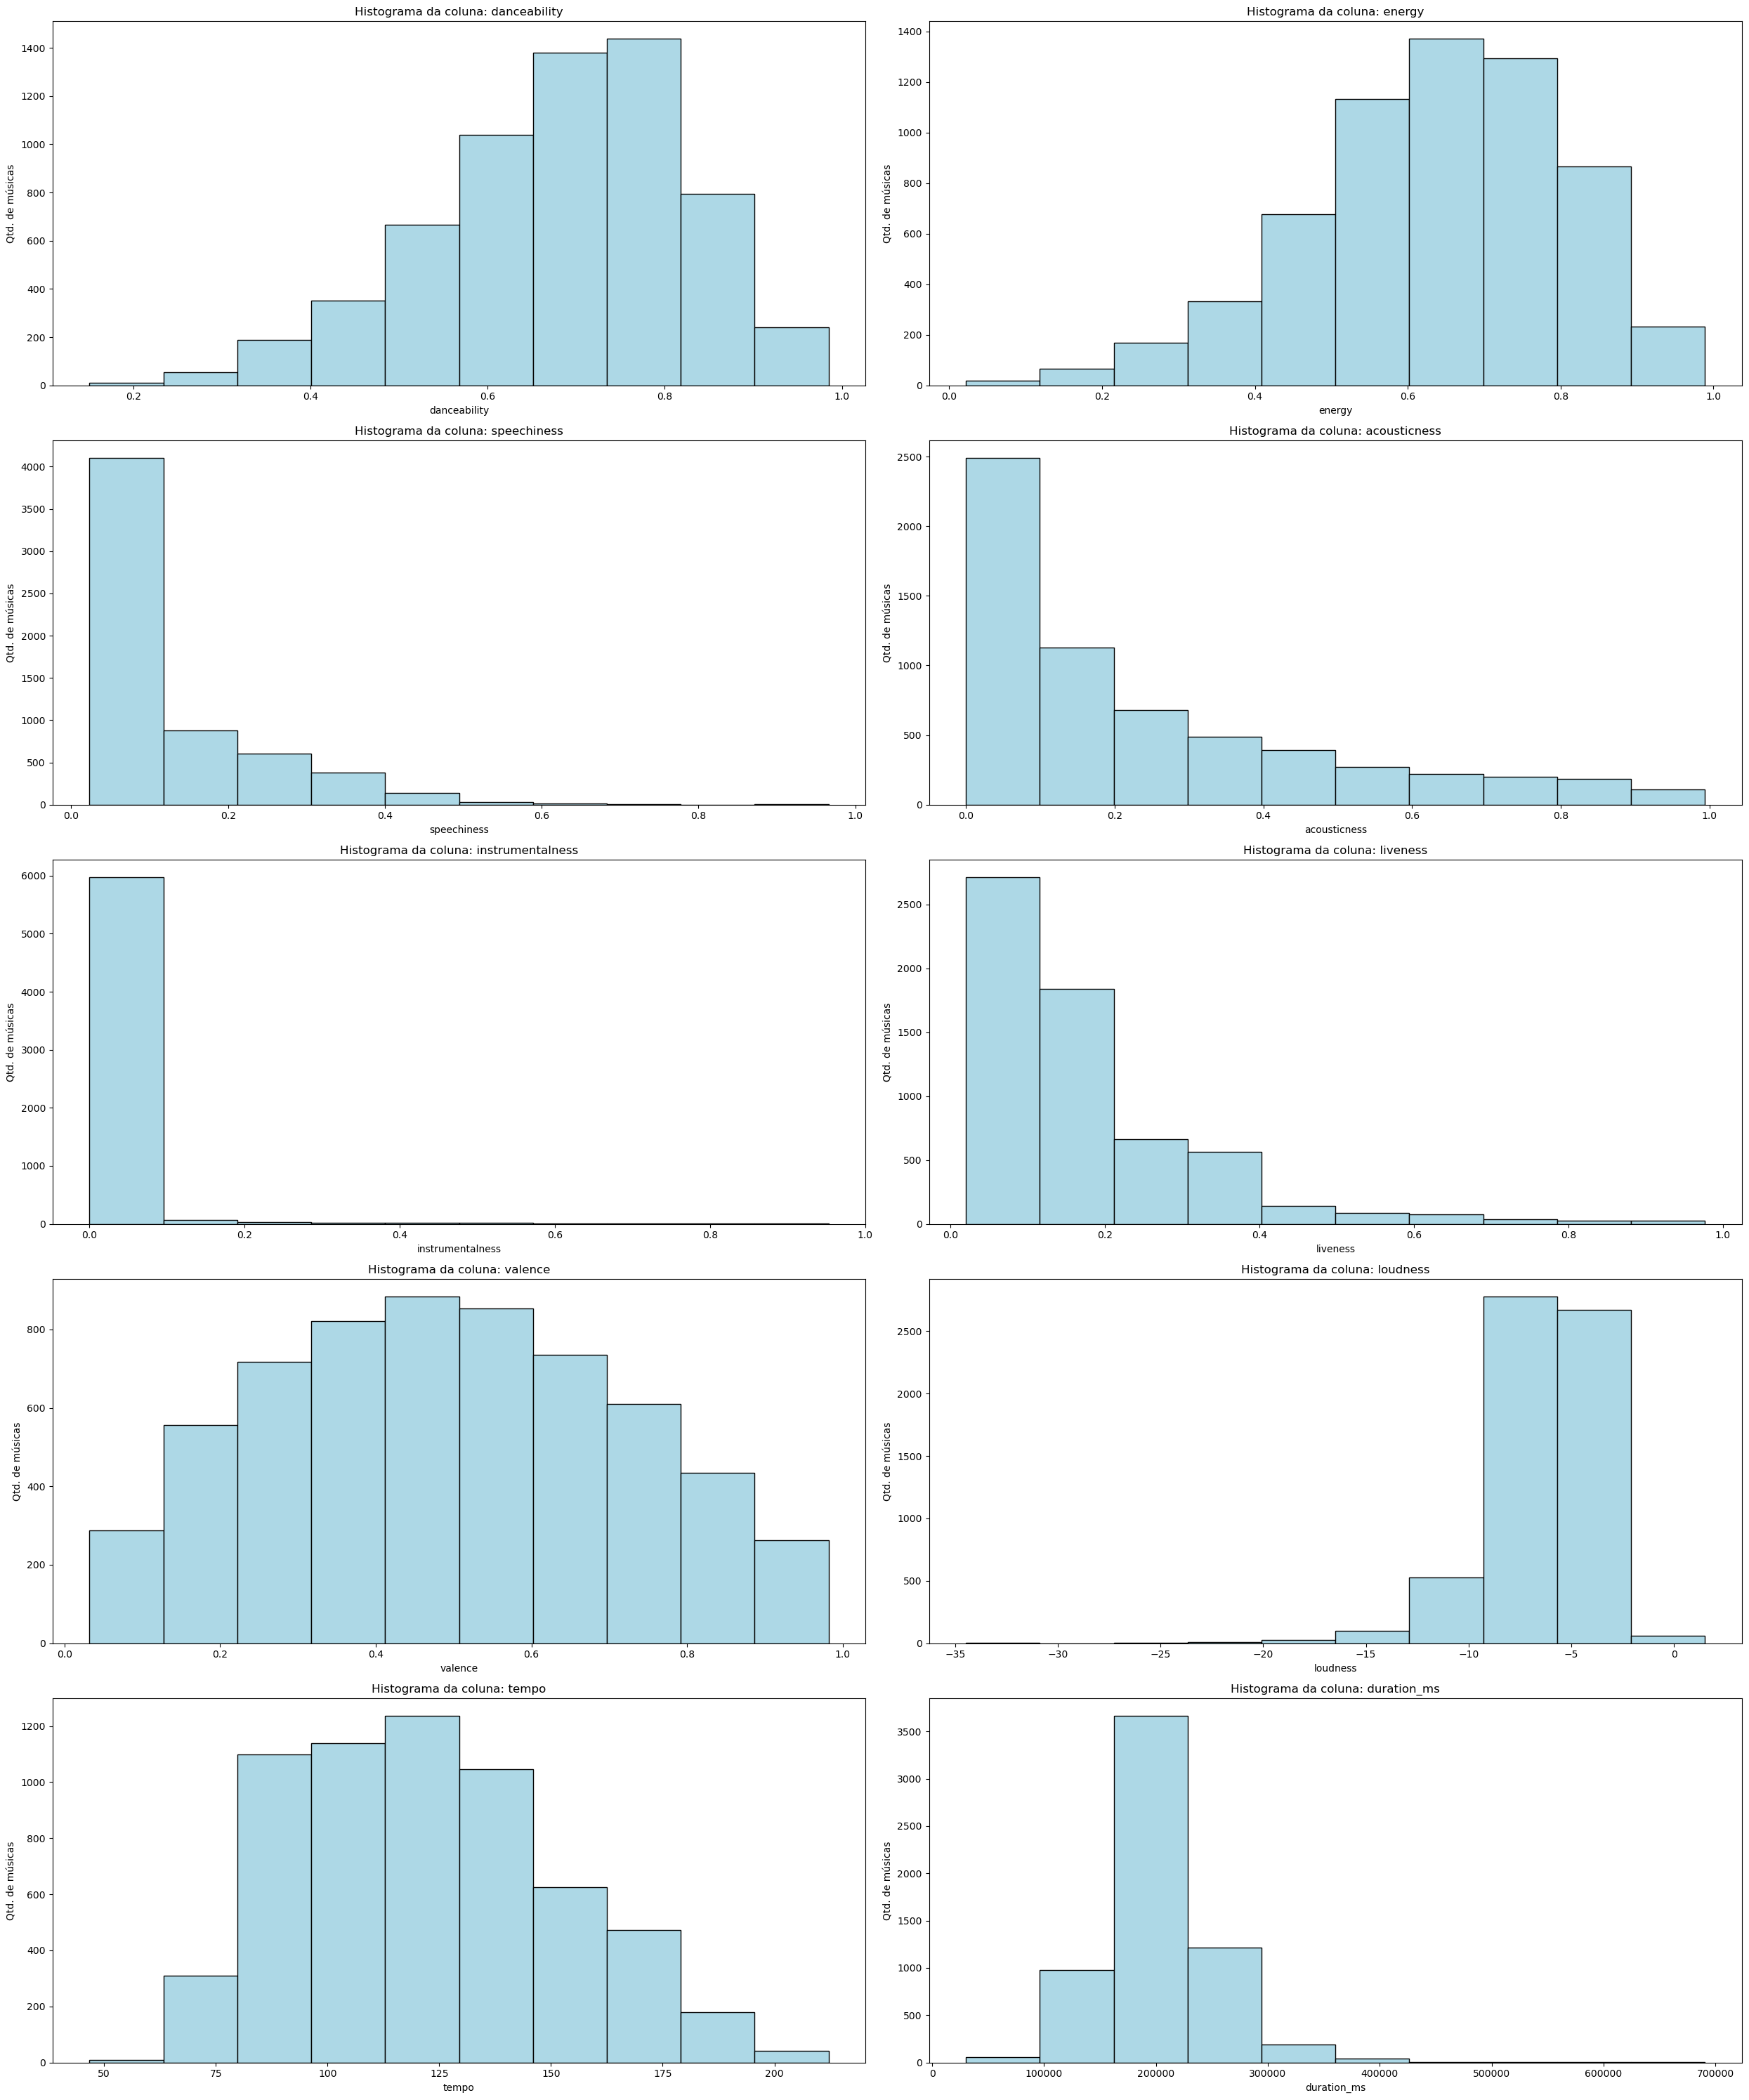

In [23]:
colunas = ['danceability', 'energy', 'speechiness',
           'acousticness', 'instrumentalness', 'liveness', 'valence', 
           'loudness', 'tempo', 'duration_ms']

# Crie uma figura e um conjunto de eixos com 6 subtramas
fig, axs = plt.subplots(5, 2, figsize=(25, 30))

# Flatten the axs array to make it easier to iterate over
axs = axs.flatten()

# Iterar sobre cada coluna especificada e criar um histograma para ela
for i, coluna in enumerate(colunas):
    axs[i].hist(dados_sem_duplicatas[coluna], bins=10, color='lightblue', edgecolor='black')
    axs[i].set_title(f'Histograma da coluna: {coluna}')
    axs[i].set_xlabel(f'{coluna}')
    axs[i].set_ylabel('Qtd. de músicas')

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar os histogramas
plt.show()

### 4\.3\. Visão por atributo

Serão exibidos histogramas para cada característica musical, mostrando como estão distribuídos os aspectos das músicas no top 200 do Spotify. Isso ajudará a compreender se as músicas desse ranking tendem a ter mais ou menos de cada característica musical analisada.
<br>
<br>
Serão destacadas as músicas com os valores mais altos (mais próximos de 1.0, ou seja, 100%) e os mais baixos (mais próximos de 0) dentro de cada característica. Além disso, identificaremos a música que está no ponto central, ou seja, mais próxima de 0.5, o que equivale a 50%.
<br>
<br>
Por exemplo, se uma música obtiver uma pontuação próxima a 1.0 em 'danceability', isso indica que ela é muito dançante, enquanto uma pontuação próxima de 0 sugere que ela não é tão dançante. Uma pontuação próxima de 0.5 significa que ela é moderadamente dançante. Essa abordagem nos permitirá compreender melhor a distribuição e variação de cada característica musical.
<br>
<br>
Para as colunas 'loudness', 'tempo' e 'duration_ms', a abordagem será diferente em relação ao ponto central, já que não estão relacionadas a valores percentuais como os outros atributos; dessa forma, será utilizada a mediana.

#### 4\.3\.1\. Função para Captura dos Resumos Musicais de Cada Histograma

A próxima função analisa dados musicais, calculando os valores mínimo, central e máximo de uma determinada característica. Em seguida, identifica as músicas associadas a esses valores.

In [24]:
def calculo_resumos(data, coluna):
    # Caalcula o valor mínimo da coluna
    minimo = data[coluna].min()
    
    # Verifica se a coluna está entre os valores específicos
    if coluna in ['loudness', 'tempo', 'duration_ms']:
        # Se for uma dessas colunas, calcula a mediana
        central = data[coluna].median()
    else:
        # Encontra o valor mais próximo de 0.5 na coluna e seleciona o valor correspondente
        central = data[coluna].iloc[(data[coluna]-0.5).abs().argsort()[:1]].values[0]
    
    # Calcula o valor máximo da coluna
    maximo = data[coluna].max()

    # Encontra as informações da música com o valor mínimo na coluna
    min_musica = data[data[coluna] == minimo][['artist_names', 'track_name']].values[0]
    
    # Encontra as informações da música com o valor central na coluna
    central_musica = data[data[coluna] == central][['artist_names', 'track_name']].values[0]
    
    # Encontra as informações da música com o valor máximo na coluna
    max_musica = data[data[coluna] == maximo][['artist_names', 'track_name']].values[0]

    return minimo, central, maximo, min_musica, central_musica, max_musica

In [25]:
def plot_histograma(coluna, x_label, descricao):
    minimo, central, maximo, min_musica, central_musica, max_musica = calculo_resumos(dados_sem_duplicatas, coluna)
    
    plt.figure(figsize=(7, 5))
    plt.hist(dados_sem_duplicatas[coluna], bins=10, color='lightblue', edgecolor='black')
    
    plt.scatter(minimo, 50, color='red', label=f'Menor valor: {min_musica[0]} \nMúsica: {min_musica[1]}')
    plt.scatter(central, 50, color='green', label=f'Valor central: {central_musica[0]} \nMúsica: {central_musica[1]}')
    plt.scatter(maximo, 50, color='orange', label=f'Maior valor: {max_musica[0]} \nMúsica: {max_musica[1]}')
    
    plt.xlabel(x_label)
    plt.ylabel('Qtd. de músicas')
    plt.title(f'Histograma da Coluna: {coluna}')
    if coluna not in ['loudness', 'tempo', 'duration_ms']:
        plt.xticks([0.2, 0.4, 0.6, 0.8, 1.0], ['20%', '40%', '60%', '80%', '100%'])
        
    
    description = descricao
    plt.figtext(0.5, -0.05, description, horizontalalignment='center', verticalalignment='center')
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [26]:
def plot_boxplot(coluna, x_label):
    box_coluna = dados[coluna]
    # Criar o boxplot horizontal com patch_artist=True
    boxplot = plt.boxplot(box_coluna, vert=False, patch_artist=True)
    # Definir a cor das caixas
    colors = ['lightblue']

    for box, color in zip(boxplot['boxes'], colors):
        box.set(facecolor=color)

    # Adicionar rótulo ao eixo y
    plt.title(f'Boxplot da Coluna: {coluna}')
    plt.xlabel(x_label)
    if coluna not in ['loudness', 'tempo', 'duration_ms']:
        plt.xticks([0.2, 0.4, 0.6, 0.8, 1.0], ['20%', '40%', '60%', '80%', '100%'])

    # Mostrar o gráfico
    plt.show()

#### 4\.3\.2\. Danceability

##### 4\.3\.2\.1\. Histograma

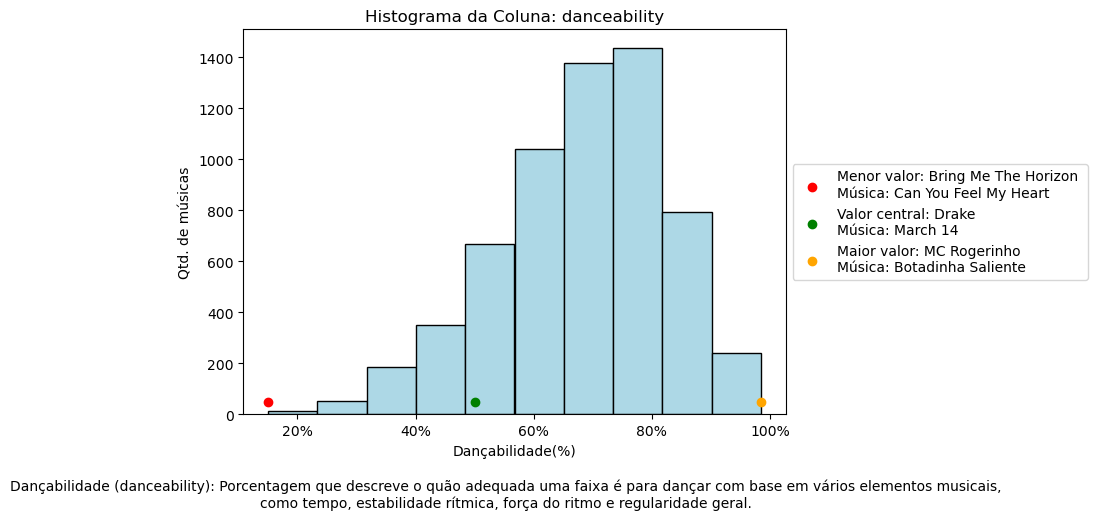

In [27]:
coluna = 'danceability'
x_label = 'Dançabilidade(%)'
descricao = f'Dançabilidade ({coluna}): Porcentagem que descreve o quão adequada uma faixa é para dançar com base em vários elementos musicais,\ncomo tempo, estabilidade rítmica, força do ritmo e regularidade geral.'

plot_histograma(coluna, x_label, descricao)

##### 4\.3\.2\.2\. Boxplot

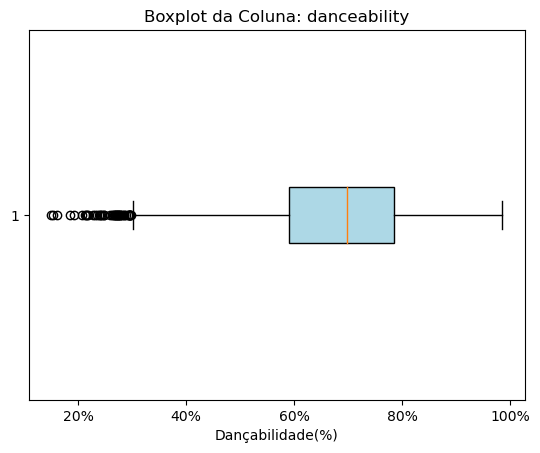

In [28]:
plot_boxplot(coluna, x_label)

#### 4\.3\.3\. Energy

##### 4\.3\.3\.1\. Histograma

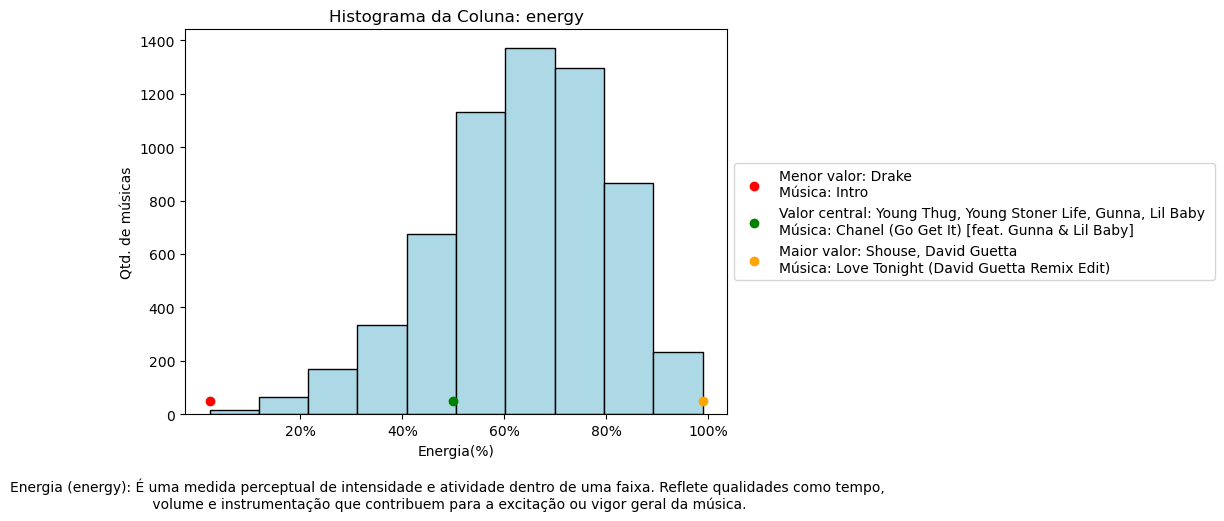

In [29]:
coluna = 'energy'
x_label = 'Energia(%)'
descricao = f'Energia ({coluna}): É uma medida perceptual de intensidade e atividade dentro de uma faixa. Reflete qualidades como tempo,\n volume e instrumentação que contribuem para a excitação ou vigor geral da música.'
plot_histograma(coluna, x_label, descricao)

##### 4\.3\.3\.2\. Boxplot

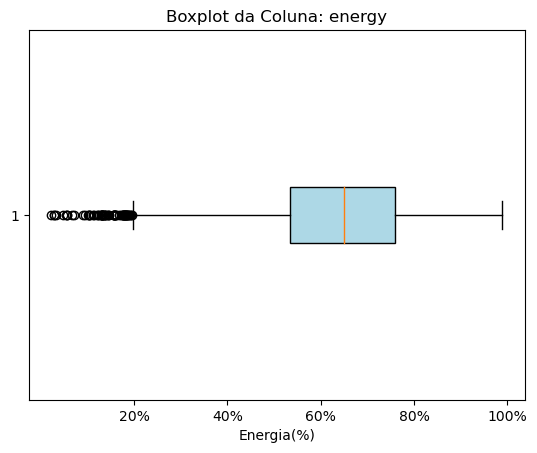

In [30]:
plot_boxplot(coluna, x_label)

#### 4\.3\.4\. Speechiness

##### 4\.3\.4\.1\. Histograma

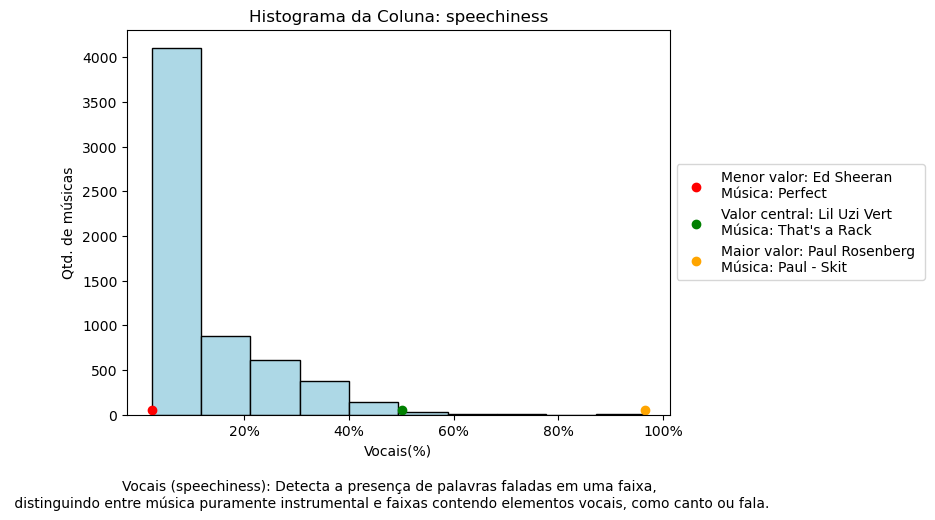

In [31]:
coluna = 'speechiness'
x_label = 'Vocais(%)'
descricao = f'Vocais ({coluna}): Detecta a presença de palavras faladas em uma faixa,\n distinguindo entre música puramente instrumental e faixas contendo elementos vocais, como canto ou fala.'
plot_histograma(coluna, x_label, descricao)

##### 4\.3\.4\.2\. Boxplot

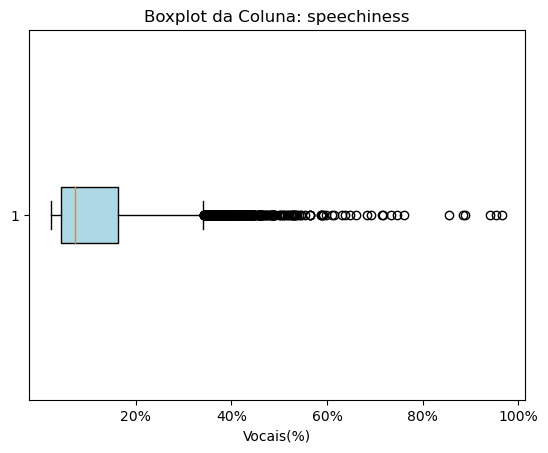

In [32]:
plot_boxplot(coluna, x_label)

#### 4\.3\.5\. Acousticness

##### 4\.3\.5\.1\. Histograma

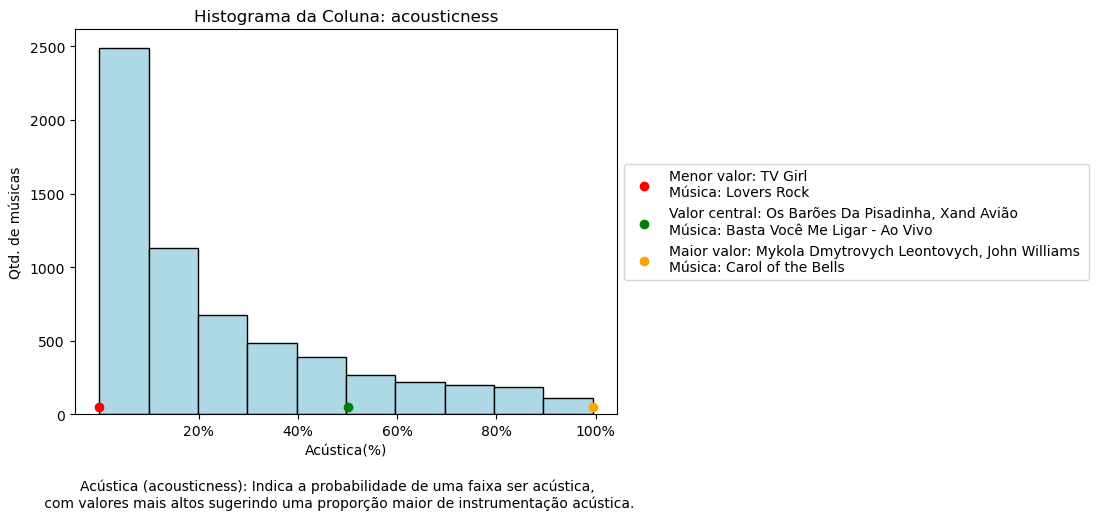

In [33]:
coluna = 'acousticness'
x_label = 'Acústica(%)'
descricao = f'Acústica ({coluna}): Indica a probabilidade de uma faixa ser acústica,\n com valores mais altos sugerindo uma proporção maior de instrumentação acústica.'
plot_histograma(coluna, x_label, descricao)

##### 4\.3\.5\.2\. Boxplot

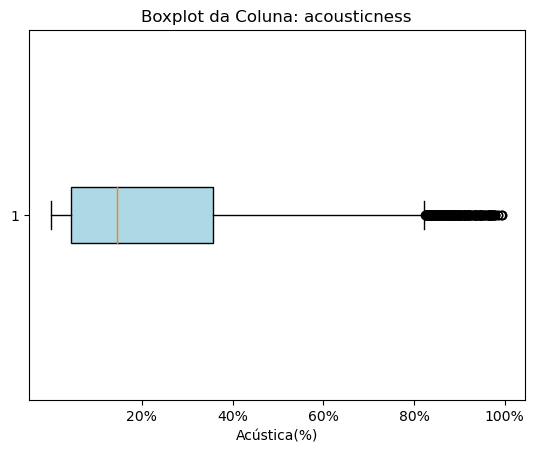

In [34]:
plot_boxplot(coluna, x_label)

#### 4\.3\.6\. Instrumentalness

##### 4\.3\.6\.1\. Histograma

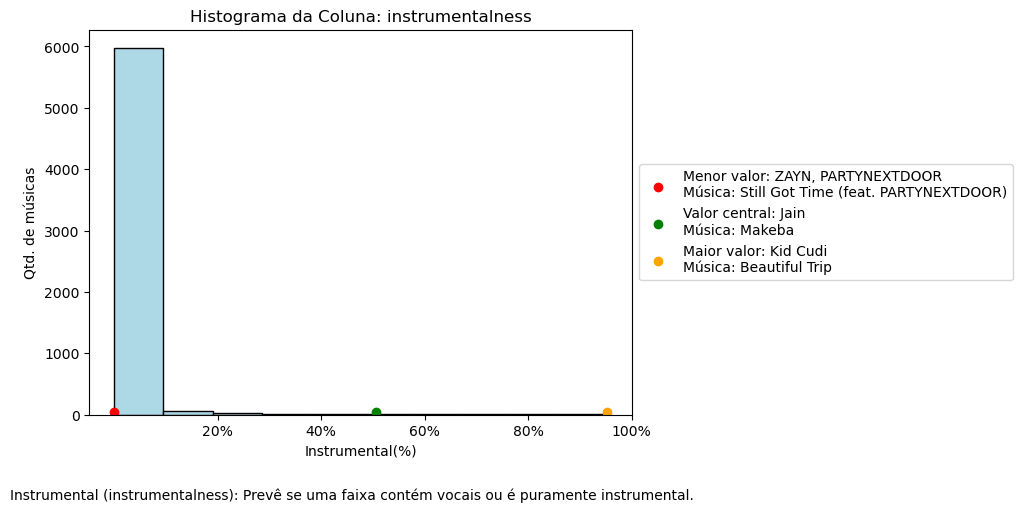

In [35]:
coluna = 'instrumentalness'
x_label = 'Instrumental(%)'
descricao = f'Instrumental ({coluna}): Prevê se uma faixa contém vocais ou é puramente instrumental.'
plot_histograma(coluna, x_label, descricao)

##### 4\.3\.6\.2\. Boxplot

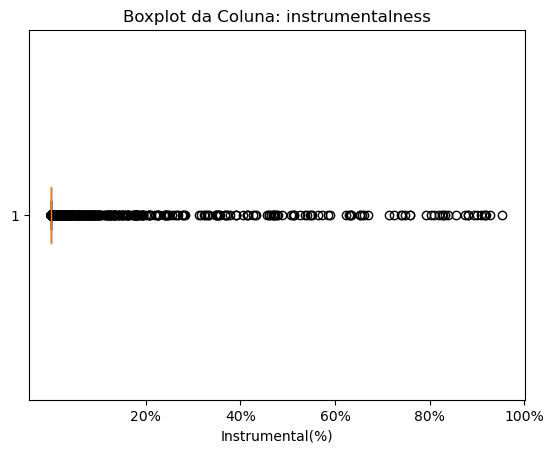

In [36]:
plot_boxplot(coluna, x_label)

#### 4\.3\.7\. Liveness

##### 4\.3\.7\.1\. Histograma

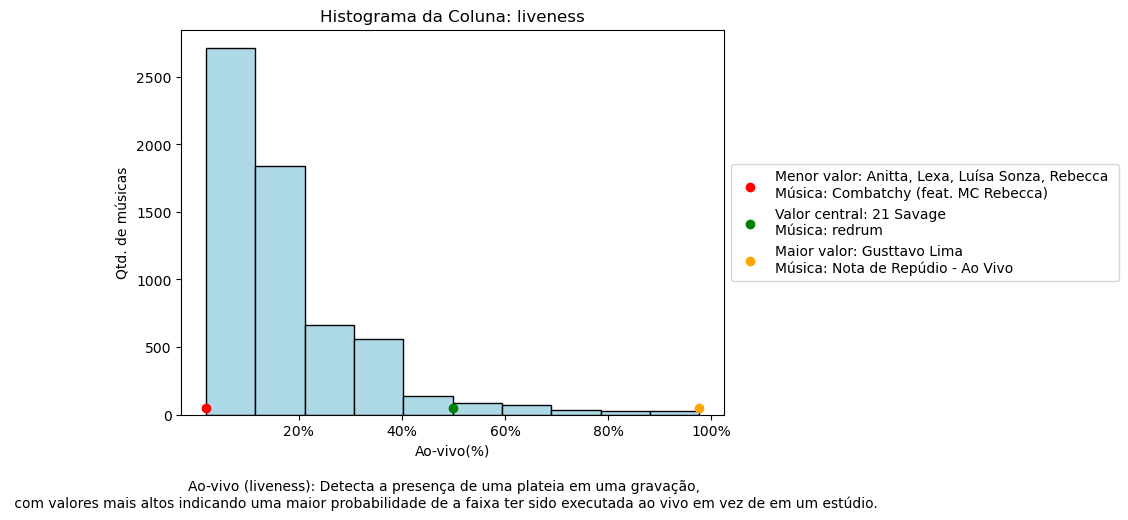

In [37]:
coluna = 'liveness'
x_label = 'Ao-vivo(%)'
descricao = f'Ao-vivo ({coluna}): Detecta a presença de uma plateia em uma gravação,\n com valores mais altos indicando uma maior probabilidade de a faixa ter sido executada ao vivo em vez de em um estúdio.'
plot_histograma(coluna, x_label, descricao)

##### 4\.3\.7\.2\. Boxplot

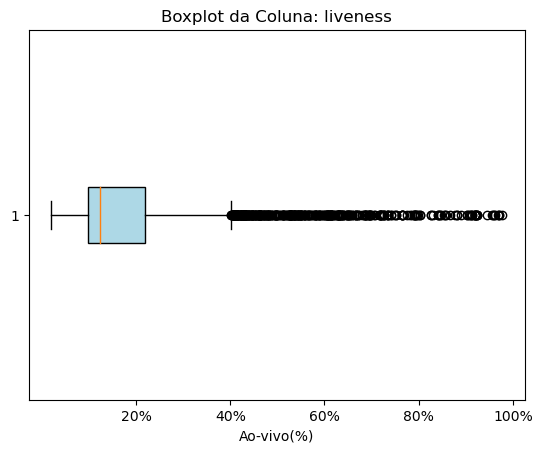

In [38]:
plot_boxplot(coluna, x_label)

#### 4\.3\.8\. Valence

##### 4\.3\.8\.1\. Histograma

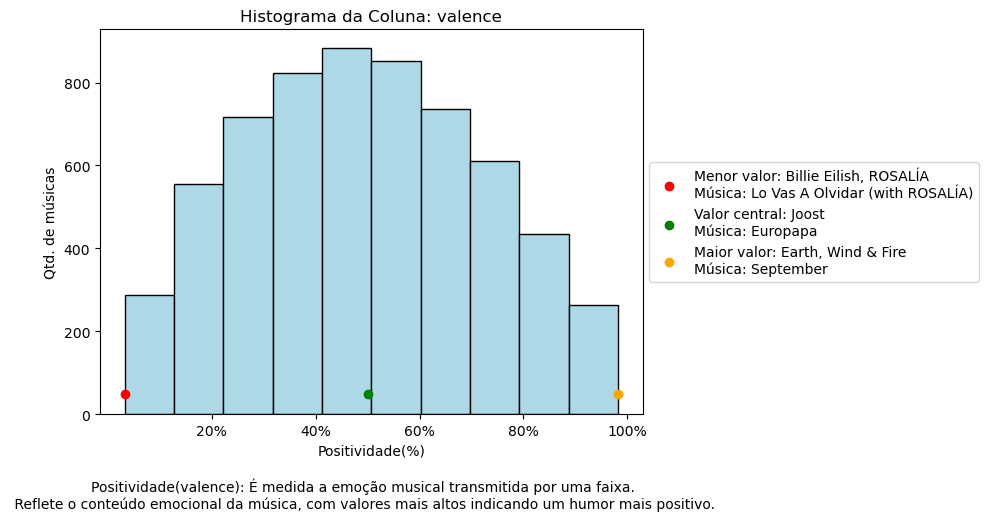

In [39]:
coluna = 'valence'
x_label = 'Positividade(%)'
descricao = f'Positividade({coluna}): É medida a emoção musical transmitida por uma faixa.\n Reflete o conteúdo emocional da música, com valores mais altos indicando um humor mais positivo.'
plot_histograma(coluna, x_label, descricao)

##### 4\.3\.8\.2\. Boxplot

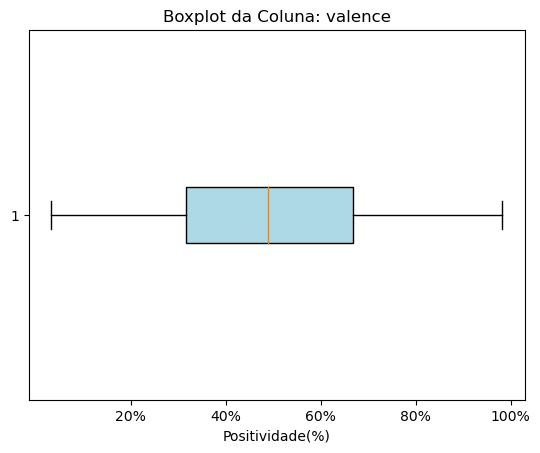

In [40]:
plot_boxplot(coluna, x_label)

#### 4\.3\.9\. Loudness

##### 4\.3\.9\.1\. Histograma

In [ ]:
coluna = 'loudness'
x_label = 'Volume'
descricao = f'Volume ({coluna}): Mede o volume geral de uma faixa em decibéis (dB), fornecendo informações sobre sua intensidade ou amplitude percebida.\n Influencia a percepção de volume ou suavidade da música.'
plot_histograma(coluna, x_label, descricao)

##### 4\.3\.9\.2\. Boxplot

In [ ]:
plot_boxplot(coluna, x_label)

#### 4\.3\.10\. Tempo

##### 4\.3\.10\.1\. Histograma

In [ ]:
coluna = 'tempo'
x_label = 'Ritmo'
descricao = f'Ritmo ({coluna}): Refere-se à velocidade geral ou ao ritmo de uma faixa, medido em batidas por minuto (BPM).\n Indica o quão rápido ou lento a música soa e influencia seu caráter rítmico.'
plot_histograma(coluna, x_label, descricao)

##### 4\.3\.10\.2\. Boxplot

In [ ]:
plot_boxplot(coluna, x_label)

#### 4\.3\.11\. Duration_ms

##### 4\.3\.11\.1\. Histograma

In [ ]:
coluna = 'duration_ms'
x_label = 'Duração(ms)'
descricao = f'Duração ({coluna}): Extensão da faixa em milissegundos (ms), representando o tempo total do início até o fim da faixa.'
plot_histograma(coluna, x_label, descricao)

##### 4\.3\.11\.2\. Boxplot

In [ ]:
plot_boxplot(coluna, x_label)

## 5\. Popularidade e Desempenho

Nesta seção, serão destacadas as músicas com o maior número de streams no top 200, além das faixas que permaneceram por mais semanas nessa posição e os artistas com a maior quantidade de streams.

### 5\.1\. Músicas com Mais Semanas

Aqui estão as músicas que permaneceram por mais tempo no ranking em uma única entrada no top 200.

In [ ]:
dados = dados.sort_values(by='weeks_on_chart', ascending=False)

dados[['artist_names', 'track_name', 'weeks_on_chart']].head(10)

#### 5\.1\.1\. Gráfico - Top 10: Músicas Com Mais Semanas no Ranking

In [ ]:
top_10 = dados[['artist_names', 'track_name', 'weeks_on_chart']].head(10)

cores = sns.color_palette("deep", len(top_10))
plt.figure(figsize=(10, 5))
index = np.arange(len(top_10))

bars = plt.bar(index, top_10['weeks_on_chart'], color=cores, edgecolor='black')
plt.xticks(index, top_10['artist_names'], rotation=90)  # Set x-tick labels to artist names with rotation
plt.ylabel('Qtd. de Semanas')
plt.xlabel('Artista e Música')
plt.title('Top 10: Músicas Com Mais Semanas no Ranking')

for idx, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{top_10["weeks_on_chart"].iloc[idx]}', 
             ha='center', va='bottom', fontsize=10, color='black')
    
plt.xticks([])

legend_labels = [f"{artista} \nMúsica: {musica}" for artista, musica in zip(top_10['artist_names'], top_10['track_name'])]
legend_handles = [Patch(color=cores[i], label=label) for i, label in enumerate(legend_labels)]
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

### 5\.2\.  Músicas Mais Tocadas

Aqui estão as músicas com maior número de streams em uma única entrada no top 200.

In [ ]:
dados = dados.sort_values(by='streams', ascending=False)

dados[['artist_names', 'track_name', 'streams']].head(10)

#### 5\.2\.1\. Gráfico - Top 10: Músicas com mais Streams

In [ ]:
top_10 = dados[['artist_names', 'track_name', 'streams']].head(10)

cores = sns.color_palette("deep", len(top_10))
plt.figure(figsize=(10, 5))
index = np.arange(len(top_10))

bars = plt.bar(index, top_10['streams'], color=cores, edgecolor='black')
plt.xticks(index, top_10['artist_names'], rotation=90)
plt.ylabel('Qtd. em Bilhões de Streams')
plt.xlabel('Artista e Música')
plt.title('Top 10: Músicas com mais Streams')

plt.xticks([])

legend_labels = [f"{artista} - {musica}\n Qtd:{streams}" for artista, musica, streams in zip(top_10['artist_names'],
                                                                                             top_10['track_name'],
                                                                                             top_10['streams'])]
legend_handles = [Patch(color=cores[i], label=label) for i, label in enumerate(legend_labels)]
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))

description = '"1e9" em notação científica, o que é igual a 1 bilhão em inglês.\n Por exemplo, "1e9" representa 1 bilhão, onde "1" é multiplicado por "10^9" (1 seguido de 9 zeros).'
plt.figtext(0.5, -0.05, description, horizontalalignment='center', verticalalignment='center')

plt.tight_layout()
plt.show()

### 5\.3\.  Artistas Mais Tocados

Serão exibidos os artistas com o maior número de reproduções no ranking, incluindo colaborações, desde que o nome do artista conste na coluna 'artist_names'.

In [ ]:
lista_nomes = artistas['Artista'].tolist()
len(lista_nomes)

In [ ]:
artist_totals = {}

# Iterando sobre o DataFrame para calcular os totais de streams para cada artista
for artist in lista_nomes:
    artist_totals[artist] = dados[dados['artist_names'].str.contains(artist, regex=False)]['streams'].sum()

# Convertendo o dicionário em um DataFrame
total_views = pd.DataFrame(list(artist_totals.items()), columns=['nome', 'total'])

total_streams = total_views.sort_values(by='total', ascending=False)

total_streams.head(10)

#### 5\.3\.1\. Gráfico - Top 10: Artistas com mais Streams

In [ ]:
top_10 = total_streams.head(10)

cores = sns.color_palette("deep", len(top_10))

plt.figure(figsize=(7, 5))

index = np.arange(len(top_10))

bars = plt.bar(index, top_10['total'], color=cores, edgecolor='black')
plt.xticks(index, top_10['nome'], rotation=90)
plt.ylabel('Qtd. em Bilhões de Streams')
plt.xlabel('Artista')
plt.title('Top 10: Artistas com mais Streams')

plt.xticks([])

legend_labels = top_10['nome']
legend_handles = [Patch(color=cores[i], label=label) for i, label in enumerate(legend_labels)]
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))

description = '"1e10" em notação científica representa o número 10 bilhões em inglês,\n onde "1" é multiplicado por "10^10" (1 seguido de 10 zeros).'
plt.figtext(0.5, -0.05, description, horizontalalignment='center', verticalalignment='center')

plt.tight_layout()
plt.show()

## 6\. Resultados

- Drake, Taylor Swift e Bad Bunny são, respectivamente, os três artistas mais populares no ranking, com base no número de aparições de suas faixas.
<br></br>
- As músicas que entraram mais vezes neste ranking são: "Jingle Bell Rock" do artista Bobby Helms e "Sleigh Ride" de The Ronettes, ambas com 6 entradas durante o período avaliado.
<br></br>
- Columbia, Republic Records e a gravadora com o nome da própria artista Taylor Swift são as gravadoras com mais aparições no ranking.
<br></br>
- A grande maioria das faixas no ranking tem uma batida musical de 4 beats, o que é comum na música popular contemporânea.
<br></br>
- A maioria das faixas não consiste apenas de palavras faladas, já que a maioria dos valores na coluna 'speechiness' está próxima de 0.
<br></br>
- A maioria das faixas possui uma taxa acústica baixa, já que a maioria dos valores na coluna 'acousticness' está próxima de 0.
<br></br>
- A grande maioria das faixas possui vocais, já que a maioria dos valores na coluna 'instrumentalness' está próxima de 0, indicando a presença de canto ou fala.
<br></br>
- As pessoas têm uma preferência por músicas gravadas em estúdio, segundo a coluna 'liveness', já que existem poucas músicas com presença de plateia no ranking.
<br></br>
- A distribuição dos valores na coluna 'valence' segue uma distribuição normal, o que significa que há uma variedade de faixas com diferentes níveis de positividade musical.
<br></br>
- A maioria das faixas está entre -11 e -3 decibéis na coluna 'loudness', indicando um volume padrão para as faixas no ranking.
<br></br>
- Existem a maioria das músicas com tempo próximo a 2000000 milissegundos, cerca de 3 minutos e 20 segundos.
<br></br>
- As três músicas que passaram mais semanas em uma única entrada no ranking foram "Believer" do Imagine Dragons, "Perfect" e "Shape of You", ambos do Ed Sheeran.
<br></br>
- As três músicas com maior quantidade de reproduções em uma única entrada são: "Blinding Lights" de The Weeknd, "Shape of You" de Ed Sheeran e "Someone You Loved" de Lewis Capaldi.
<br></br>
- Os três artistas mais reproduzidos, incluindo participações em faixas de outros artistas, são: Bad Bunny, The Weeknd e Drake.